<a href="https://colab.research.google.com/github/202311003/idm_assignment_2/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CP2/hospital.csv')

<ipython-input-3-77e88287d91b>:1: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/CP2/hospital.csv')


In [4]:
df

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,NaN,NaN,NaN,NaN,NaN,0,Y,Y,11738.58,3295.21


In [5]:
df.shape

(2622133, 38)

In [6]:
df.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Operating Certificate Number'}>,
        <Axes: title={'center': 'Facility ID'}>,
        <Axes: title={'center': 'Discharge Year'}>],
       [<Axes: title={'center': 'CCS Diagnosis Code'}>,
        <Axes: title={'center': 'CCS Procedure Code'}>,
        <Axes: title={'center': 'APR DRG Code'}>,
        <Axes: title={'center': 'APR MDC Code'}>],
       [<Axes: title={'center': 'APR Severity of Illness Code'}>,
        <Axes: title={'center': 'Attending Provider License Number'}>,
        <Axes: title={'center': 'Operating Provider License Number'}>,
        <Axes: title={'center': 'Other Provider License Number'}>],
       [<Axes: title={'center': 'Birth Weight'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Costs'}>, <Axes: >]], dtype=object)

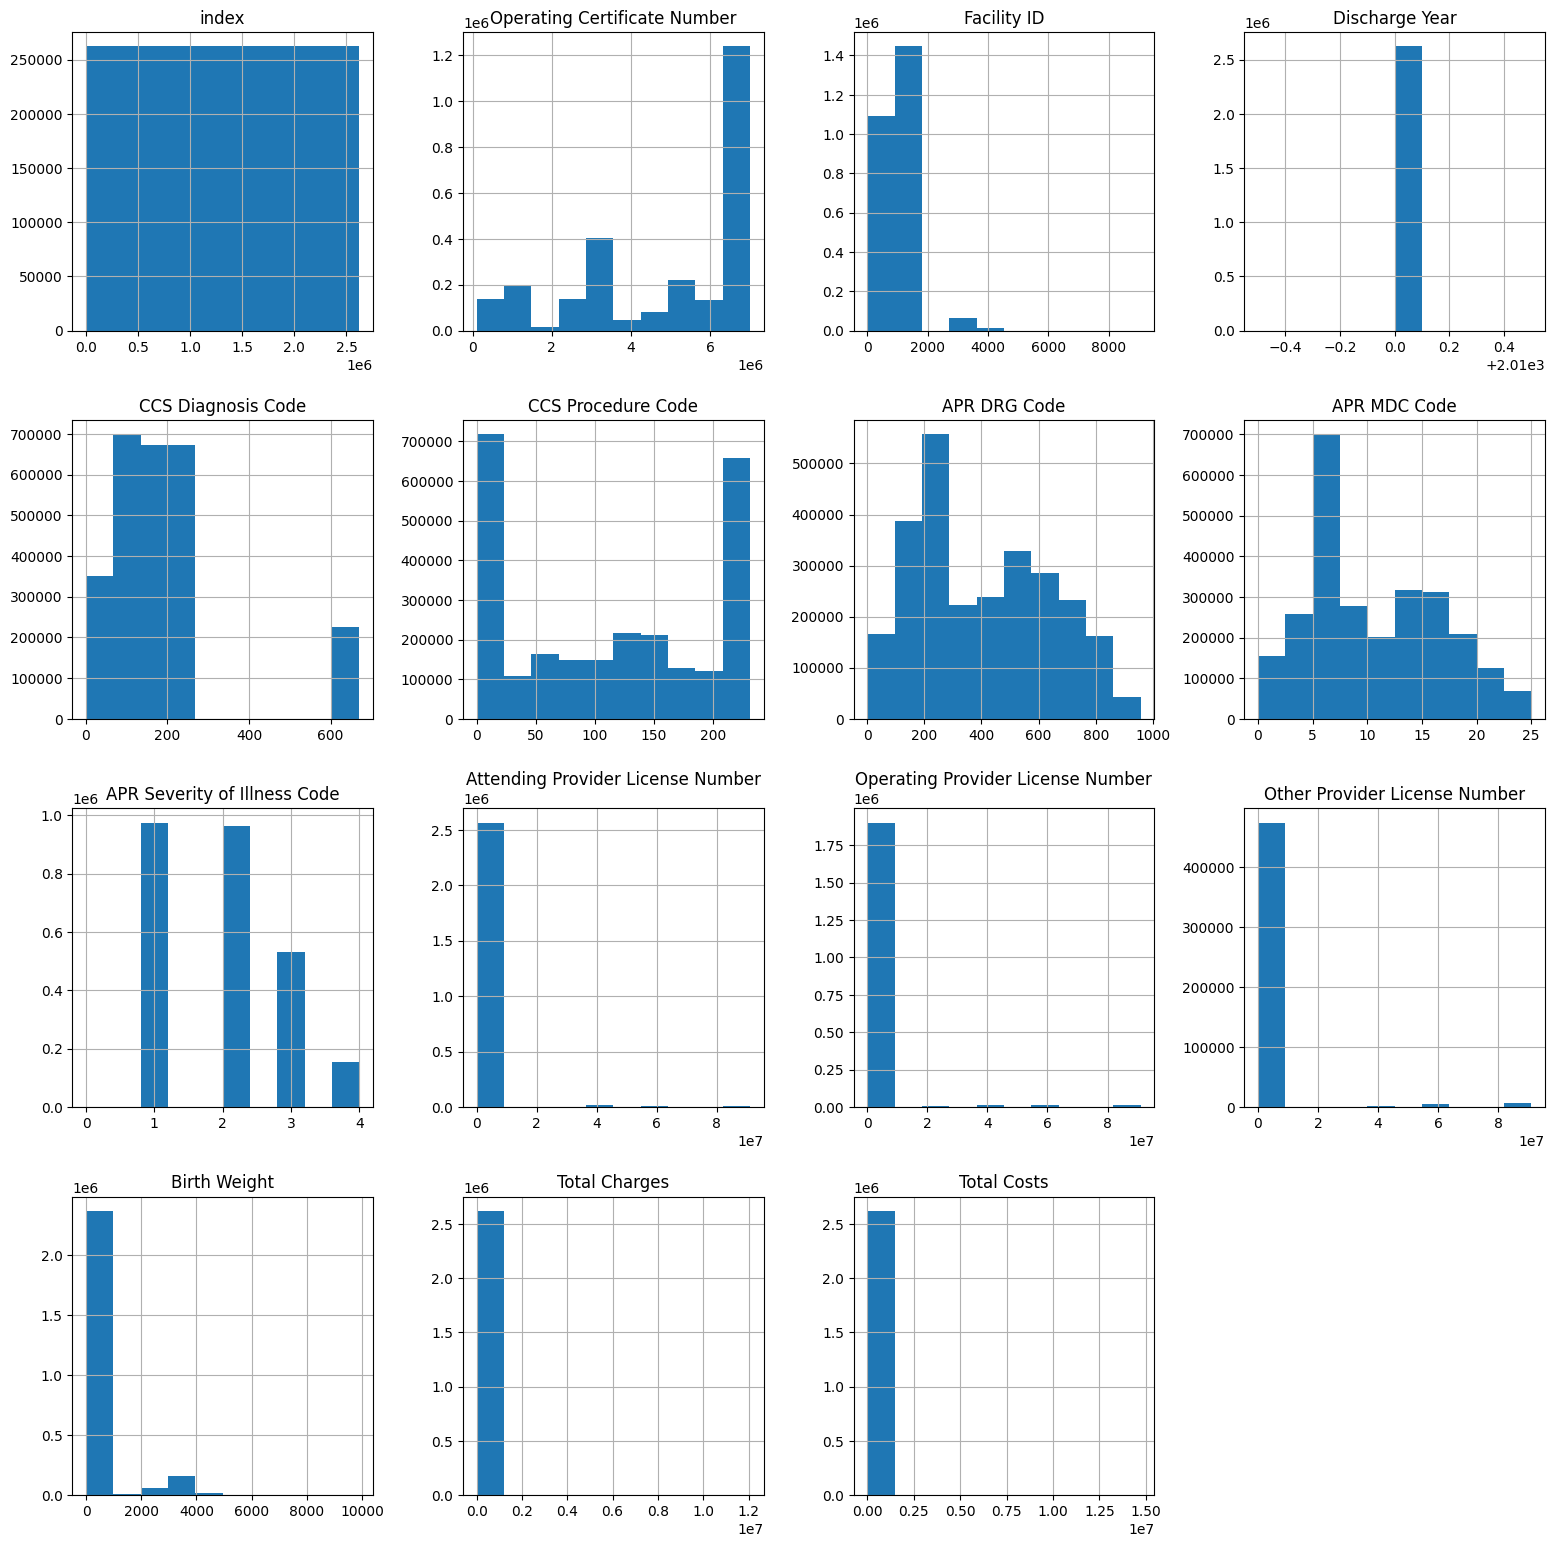

In [8]:
df.hist(figsize=(19,19))

In [9]:
df.isnull().sum() / len(df) *100

index                                   0.000000
Health Service Area                     0.186375
Hospital County                         0.186375
Operating Certificate Number            0.186375
Facility ID                             0.186375
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.122076
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.003928
Discharge Year                          0.000000
CCS Diagnosis Code                      0.086685
CCS Diagnosis Description               0.086685
CCS Procedure Code                      0.086685
CCS Procedure Description               0.086685
APR DRG Code                            0.000000
APR DRG Description 

In [10]:
df.nunique()

index                                  2622133
Health Service Area                          8
Hospital County                             57
Operating Certificate Number               189
Facility ID                                225
Facility Name                              225
Age Group                                    5
Zip Code - 3 digits                         78
Gender                                       3
Race                                         4
Ethnicity                                    3
Length of Stay                             222
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         262
CCS Diagnosis Description                  262
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code 

In [11]:
df = df.drop(df[df['Zip Code - 3 digits'] == 'OOS'].index)
df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].astype(float)
df = df.dropna(subset=['Zip Code - 3 digits'])
df['Zip Code - 3 digits'].unique()

array([100., 101., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 144., 145.,
       146., 147., 148., 149., 143.])

In [12]:
df['Length of Stay'].unique()
nan_count = df['Length of Stay'].isna().sum()
df = df.dropna(subset=['Length of Stay'])
nan_count = df['Length of Stay'].isna().sum()
nan_count
# df['Length of Stay'] = df['Length of Stay'].astype(float)
# df['Length of Stay'] = df['Length of Stay'].str.replace('NaN', 0)
df['Length of Stay'] = df['Length of Stay'].str.replace('+', '').astype(float)

<ipython-input-12-aec944129f58>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Length of Stay'] = df['Length of Stay'].str.replace('+', '').astype(float)


In [13]:
df = df.drop(df[df.Gender == 'U'].index)
df = df.drop(df[df.Race == 'Unknown'].index)
df = df.drop(df[df.Ethnicity == 'Unknown'].index)
df = df.drop(df[df['Source of Payment 1'] == 'Unknown'].index)
df = df.drop(df[df['Type of Admission'] == 'Not Available'].index)
df = df.drop(df[df['Patient Disposition'] == 'Another Type Not Listed'].index)

In [14]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

labled_df = df

columns_to_encode = ['Health Service Area','Hospital County','Facility Name','Age Group', 'Gender','Race','Ethnicity','Type of Admission','Patient Disposition','CCS Diagnosis Description',
                      'CCS Procedure Description','APR DRG Description','APR MDC Description',
                     'APR Severity of Illness Description','APR Risk of Mortality','APR Medical Surgical Description','Source of Payment 1','Source of Payment 2','Source of Payment 3','Abortion Edit Indicator','Emergency Department Indicator']
# Fit and transform the 'Color' column
labled_df[columns_to_encode] = labled_df[columns_to_encode].apply(label_encoder.fit_transform)

labled_df[columns_to_encode]

,Health Service Area,Hospital County,Facility Name,Age Group,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,CCS Diagnosis Description,...,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Abortion Edit Indicator,Emergency Department Indicator
5,0,0,3,0,1,2,0,1,6,54,...,162,20,3,2,0,2,7,10,0,0
6,0,0,3,0,1,2,0,1,7,54,...,162,20,3,2,0,3,7,10,0,1
7,0,0,3,0,0,2,0,1,6,152,...,262,22,3,2,0,2,7,10,0,1
8,0,0,3,0,0,2,0,1,6,17,...,90,10,2,2,0,2,7,10,0,1
9,0,0,3,2,1,2,0,0,6,0,...,98,4,2,2,2,5,7,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622049,8,57,0,2,0,1,0,0,6,186,...,1,24,2,2,0,0,10,10,1,0
2622050,8,57,0,2,0,1,0,0,6,238,...,1,24,3,2,0,0,10,10,1,0
2622052,8,57,0,1,0,2,0,4,12,241,...,209,24,1,2,0,3,10,10,1,1
2622055,8,57,0,1,0,2,0,1,6,196,...,64,7,3,2,0,3,10,10,1,1


In [15]:
labled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372078 entries, 5 to 2622056
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  int64  
 2   Hospital County                      int64  
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        int64  
 6   Age Group                            int64  
 7   Zip Code - 3 digits                  float64
 8   Gender                               int64  
 9   Race                                 int64  
 10  Ethnicity                            int64  
 11  Length of Stay                       float64
 12  Type of Admission                    int64  
 13  Patient Disposition                  int64  
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [16]:
labled_df.shape

(2372078, 38)

In [17]:
# new_df = labled_df['Health Service Area','Hospital County','Facility ID','Age Group','Zip Code - 3 digits','Gender','Race','Ethnicity','Length of Stay','Type of Admission']
columns_to_drop = ['index', 'Health Service Area','Hospital County','Operating Certificate Number','Facility Name','Discharge Year','Source of Payment 2','Source of Payment 3','Attending Provider License Number','Operating Provider License Number','Other Provider License Number','Abortion Edit Indicator','Emergency Department Indicator','Total Charges','Total Costs']
new_df = labled_df.drop(columns=columns_to_drop)

Text(0.5, 1.0, 'Correlation Heatmap')

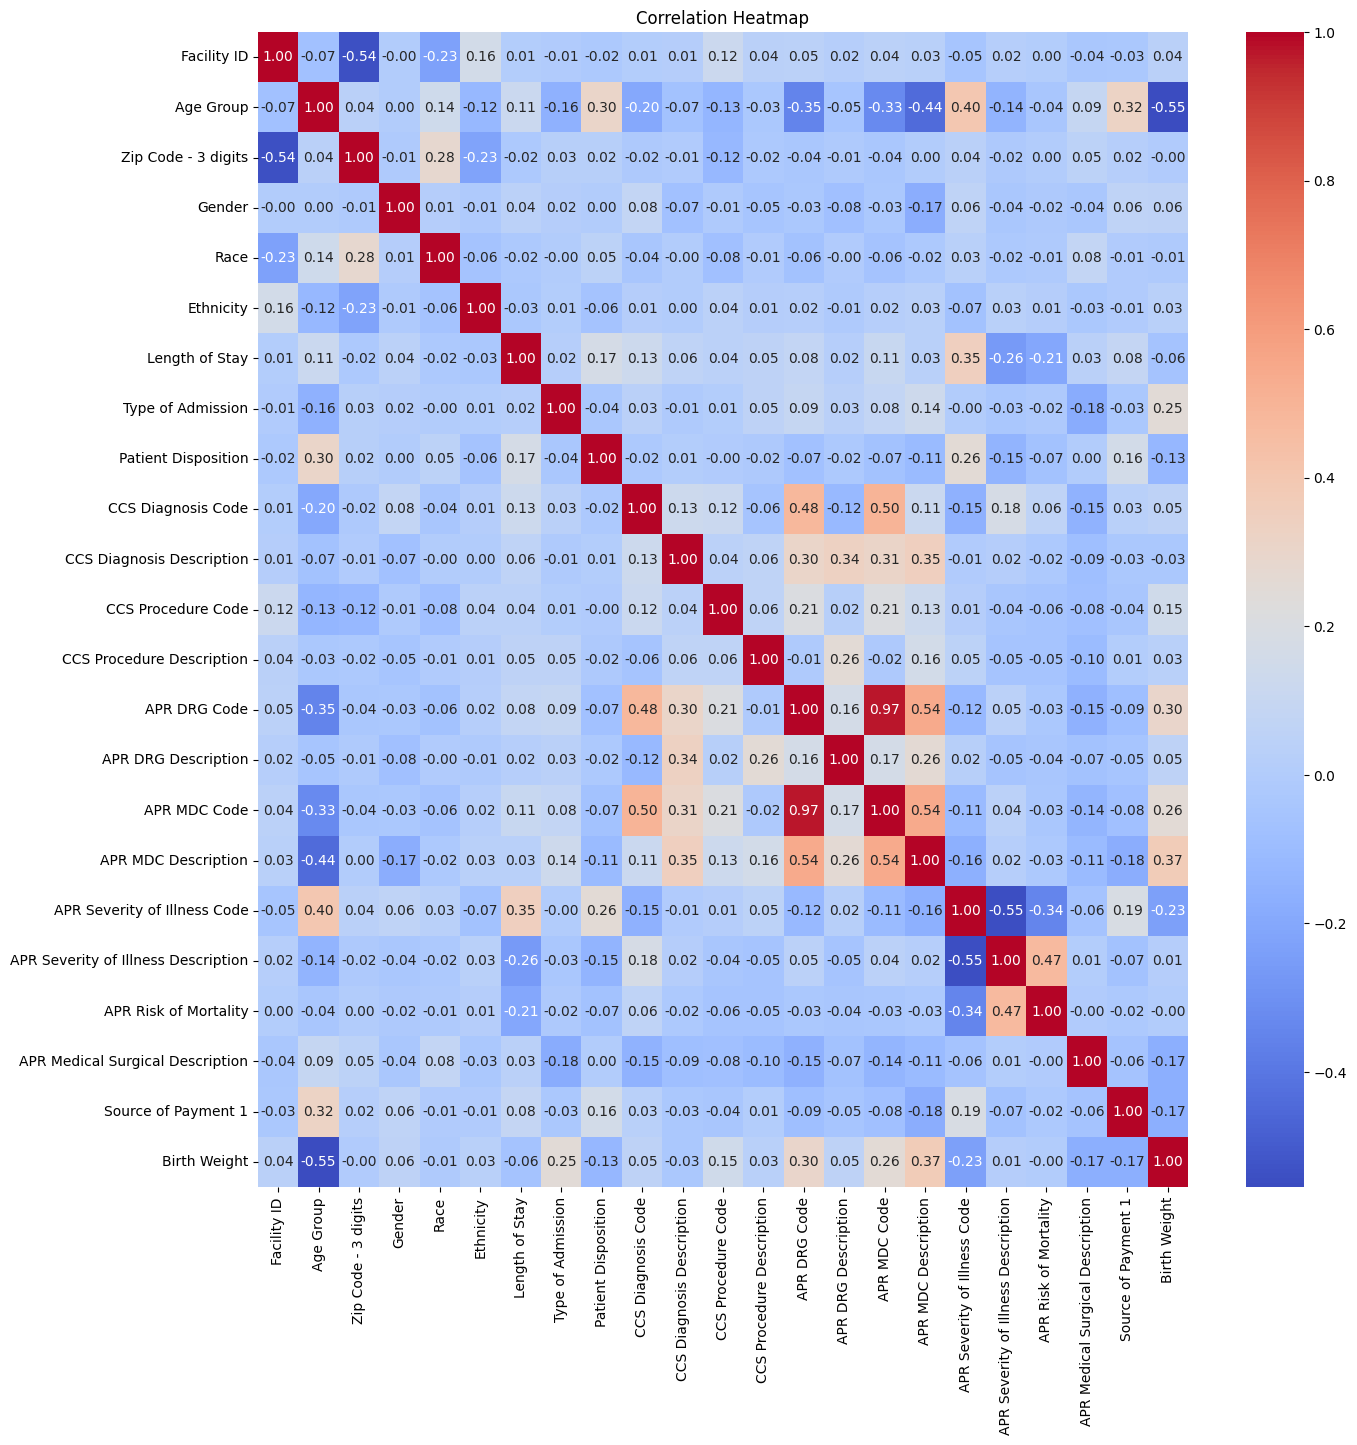

In [18]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

In [19]:
new_df = new_df.dropna()
X = new_df.drop(columns=['APR Severity of Illness Description','APR Severity of Illness Code'])
y = new_df[['APR Severity of Illness Code']]

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283040 entries, 5 to 2605055
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Facility ID                       float64
 1   Age Group                         int64  
 2   Zip Code - 3 digits               float64
 3   Gender                            int64  
 4   Race                              int64  
 5   Ethnicity                         int64  
 6   Length of Stay                    float64
 7   Type of Admission                 int64  
 8   Patient Disposition               int64  
 9   CCS Diagnosis Code                float64
 10  CCS Diagnosis Description         int64  
 11  CCS Procedure Code                float64
 12  CCS Procedure Description         int64  
 13  APR DRG Code                      int64  
 14  APR DRG Description               int64  
 15  APR MDC Code                      int64  
 16  APR MDC Description               in

In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create your feature matrix (X) and target vector (y)
# X should contain your features, and y should contain your target labels.

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # For multiclass classification
    num_class=4,      # Number of classes in your target variable
    n_estimators=100,          # Number of boosting rounds
    max_depth=7,               # Maximum depth of each tree
    learning_rate=0.01          # Step size shrinkage to prevent overfitting
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.65


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset and prepare X (features) and y (target variable)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your dataset and prepare X (features) and y (target variable)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Create a GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model found by grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
